# BERT et SQuAD pour l’interprétation et l’analyse des réponses à des questions en langage naturel - Projet 4

Van Duy Le / Radja Djihane Elmiri

In [ ]:
# install required python packages
!pip install seaborn
!pip install pandas
!pip install matplotlib
!pip install transformers
!pip install captum
#mecab
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.996.3

#neologd
# !git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
# !echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

!pip install transformers
!pip install fugashi==1.1.0 ipadic==1.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# import required python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizer, BertForQuestionAnswering
from captum.attr import LayerIntegratedGradients

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = BertForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,)

In [ ]:
# Define input data
question, text = "Where is the Eiffel Tower located?", "The Eiffel Tower is one of the most famous landmarks in the world, located in Paris, France."

In [ ]:
# Tokenize input
inputs = tokenizer.encode_plus(question, text, return_tensors="pt").to(device)
input_ids = inputs["input_ids"].tolist()[0]

In [ ]:
# Get model output
output = model(**inputs)
start_scores, end_scores = output.start_logits, output.end_logits
start = torch.argmax(start_scores)
end = torch.argmax(end_scores) + 1

In [ ]:
# Decode answer
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start:end]))
print("Predicted Answer:", answer)

Predicted Answer: paris , france


In [ ]:
# Custom function for Captum to return only start scores
def predict(input_ids):
    output = model(input_ids)
    return output.start_logits

In [ ]:
# Interpretation using Captum
lig = LayerIntegratedGradients(predict, model.bert.embeddings)
attrs = lig.attribute(inputs["input_ids"], target=start, return_convergence_delta=False)

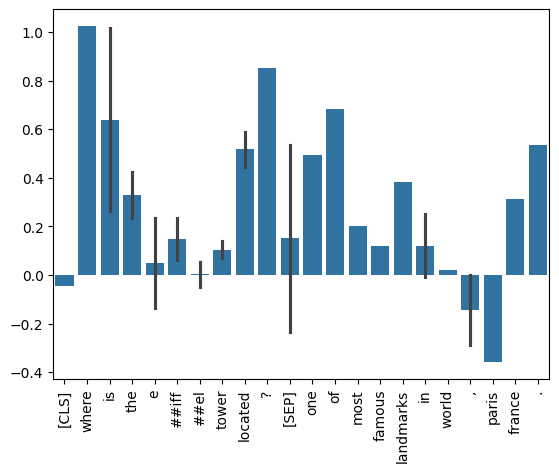

In [ ]:
# Visualization
attrs = attrs.sum(dim=-1).squeeze(0).cpu().numpy()
sns.barplot(x=tokenizer.convert_ids_to_tokens(input_ids), y=attrs)
plt.xticks(rotation=90)
plt.show()

# Autres Question et text

Predicted Answer: sir isaac newton


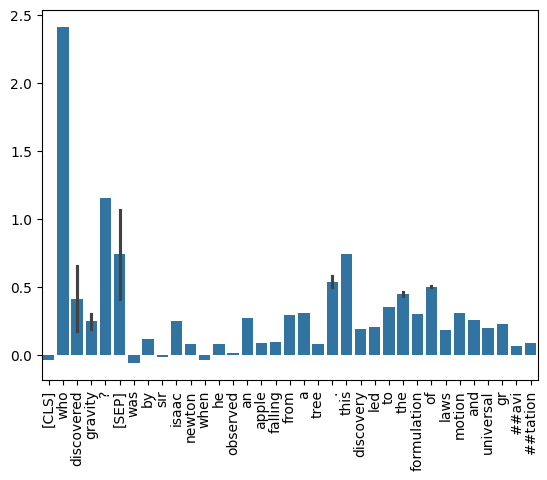

In [ ]:
# Define new input data
question, text = "Who discovered gravity?", "Gravity was discovered by Sir Isaac Newton when he observed an apple falling from a tree. This discovery led to the formulation of the laws of motion and universal gravitation."

# Tokenize input with attention mask
inputs = tokenizer.encode_plus(question, text, return_tensors="pt", padding=True, truncation=True).to(device)
input_ids = inputs["input_ids"].tolist()[0]

# Get model output
output = model(**inputs)
start_scores, end_scores = output.start_logits, output.end_logits
start = torch.argmax(start_scores)
end = torch.argmax(end_scores) + 1

# Decode answer
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start:end]))
print("Predicted Answer:", answer)

# Custom function for Captum to return only start scores
def predict(input_ids):
    output = model(input_ids)
    return output.start_logits

# Interpretation using Captum
lig = LayerIntegratedGradients(predict, model.bert.embeddings)
attrs = lig.attribute(inputs["input_ids"], target=start, return_convergence_delta=False)

# Visualization
attrs = attrs.sum(dim=-1).squeeze(0).cpu().numpy()
sns.barplot(x=tokenizer.convert_ids_to_tokens(input_ids), y=attrs)
plt.xticks(rotation=90)
plt.show()